In [1]:
#!pip install pyreadr

import pyreadr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [2]:
raw_data = pyreadr.read_r('48_-_breast_cancer_data.RData')['out'] # to be able to read the RData in python
# raw_data.to_csv('dataset.csv')

In [3]:
raw_data

,der_ordinal_v1a,der_days_fu,der_deadbinary,der_dead30,der_mv,der_ICU,der_hosp,der_AKI_comp,der_MOF_comp,der_coinfection_any,...,der_txline,der_heme,der_metastatic,der_met_bone,der_met_liver,der_met_lung_v2,der_age_trunc,der_CV_event_v2,der_pulm_event,der_GI_event
0,0,30.0,No,No,No,No,No,No,No,No,...,First line,0,Missing/Unknown,NaN,NaN,NaN,58.0,No,Yes,No
1,0,180.0,No,No,No,No,No,No,No,NaN,...,Non-curative NOS,0,Yes,Yes,No,No,67.0,No,No,No
2,1,10.5,No,No,No,No,Yes,No,No,NaN,...,First line,0,No,No,No,No,42.0,No,No,No
3,1,180.0,No,No,No,No,Yes,No,No,No,...,Untreated in last 12 months,0,Yes,Yes,Yes,No,49.0,No,Yes,No
4,0,180.0,No,No,No,No,No,No,No,No,...,First line,0,No,No,No,No,47.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,0,180.0,No,No,No,No,No,No,No,No,...,First line,0,No,No,No,No,58.0,No,No,No
1379,1,30.0,No,No,No,No,Yes,Yes,No,No,...,Curative NOS,0,Yes,No,No,No,73.0,No,No,No
1380,0,135.0,No,No,No,No,No,No,No,No,...,Untreated in last 12 months,0,No,No,No,No,60.0,No,No,No
1381,1,10.5,No,No,No,No,Yes,No,No,No,...,Untreated in last 12 months,0,No,No,No,No,60.0,No,Yes,No


# Q2: Is smoking a factor to have a severe COVID for individuals with Breast Cancer?

Hypothesis: Individuals who smoke and have Breast Cancer have a higher chance of having a severe COVID compared to the individuals who do not smoke.

## Overall Smoking Status

In [4]:
# Creating a data frame for the smoking status
Smoking_df = pd.DataFrame(raw_data["der_smoking2"])
Smoking_df

,der_smoking2
0,Current or Former
1,Never
2,Never
3,Never
4,Never
...,...
1378,Current or Former
1379,Never
1380,Never
1381,Never


In [5]:
# Cleaning the empty cells 
Smoking = Smoking_df.dropna()
Smoking

,der_smoking2
0,Current or Former
1,Never
2,Never
3,Never
4,Never
...,...
1378,Current or Former
1379,Never
1380,Never
1381,Never


In [6]:
# Creating an empty list to hold the number of each smoking status
Status_Count = []

# Number of individuals who never smoked
NonSmokers_Count = Smoking.value_counts()["Never"]
print(f"{NonSmokers_Count} individuas has never smoked in their life")
Status_Count.append(NonSmokers_Count)

# Number of individuals who are a current smoker or used to smoke.
Smokers_Count = Smoking.value_counts()["Current or Former"]
print(f"{Smokers_Count} individuas are a current smoker or used to smoke")
Status_Count.append(Smokers_Count)

# Number of unknown smoking status.
try:
    Unknown_Count = Smoking.value_counts()["Unknown"]
    print(f"{Unknown_Count} individuas have an unknown smoking status")
    Status_Count.append(Unknown_Count)
except:
    print("No unknown smoking status was found")

print(Status_Count)

911 individuas has never smoked in their life
442 individuas are a current smoker or used to smoke
No unknown smoking status was found
[911, 442]


FileNotFoundError: [Errno 2] No such file or directory: 'Smoking_Output_Data/SmokingQ_Plot(1).png'

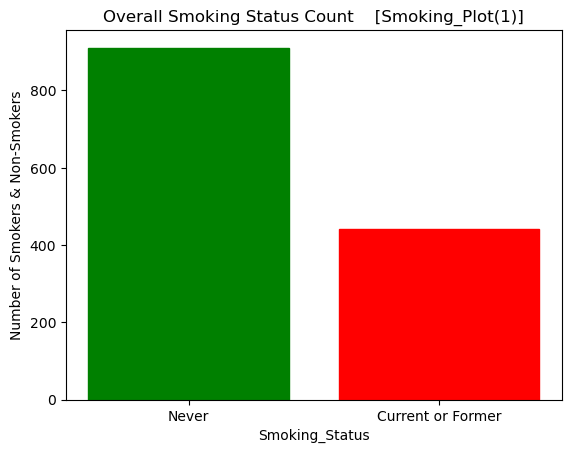

In [7]:
# Creating a plot to compare the amount of smokers vs. non-smokers
Smoking_Status = ["Never","Current or Former"]
x_axis = np.arange(len(Status_Count))
Overall_Smoking = plt.bar(x_axis, Status_Count, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Smoking_Status)
plt.title("Overall Smoking Status Count    [Smoking_Plot(1)]")
plt.xlabel("Smoking_Status")
plt.ylabel("Number of Smokers & Non-Smokers")
Overall_Smoking[0].set_color('green')
Overall_Smoking[1].set_color('red')
# Save the figure
plt.savefig("Smoking_Output_Data/SmokingQ_Plot(1).png", bbox_inches='tight')

## Breast Cancer Status at Time of COVID Diagnosis VS. Smoking Status

In [8]:
# Creating a data frame for the cancer status and the smoking status
Cancer_Smoking_df = pd.DataFrame(raw_data[["der_smoking2", "der_cancer_status_v4"]])
Cancer_Smoking_df

,der_smoking2,der_cancer_status_v4
0,Current or Former,Active and responding
1,Never,Active and stable
2,Never,NaN
3,Never,Unknown
4,Never,Active and responding
...,...,...
1378,Current or Former,Active and responding
1379,Never,Active and responding
1380,Never,"Remission or no evidence of disease, >5 years"
1381,Never,Unknown


In [9]:
# Cleaning the empty cells 
Cancer_Smoking = Cancer_Smoking_df.dropna()
Cancer_Smoking.sample(20)

,der_smoking2,der_cancer_status_v4
491,Never,"Remission or no evidence of disease, <5 years"
1063,Never,"Remission or no evidence of disease, <5 years"
382,Never,"Remission or no evidence of disease, <5 years"
1074,Current or Former,Active and stable
915,Never,"Remission or no evidence of disease, >5 years"
157,Current or Former,"Remission or no evidence of disease, >5 years"
892,Never,"Remission or no evidence of disease, <5 years"
411,Current or Former,"Remission or no evidence of disease, <5 years"
338,Never,"Remission or no evidence of disease, <5 years"
968,Current or Former,"Remission or no evidence of disease, >5 years"


In [10]:
# Creating an empty list to hold the values for smoker individuals with different breast cancer status
Smoker_BC_Count = []

In [11]:
# Individuals who are smokers and their cancer status is Active and responding
NonSmoker_A_Responding = Cancer_Smoking_df.loc[(Cancer_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Smoking_df["der_cancer_status_v4"] == "Active and responding")]
NonSmoker_A_Responding_Count = len(NonSmoker_A_Responding)
Smoker_BC_Count.append(NonSmoker_A_Responding_Count)
print(Smoker_BC_Count)

[54]


In [12]:
# Individuals who are smokers and their cancer status is Active and stable
NonSmoker_A_Stable = Cancer_Smoking_df.loc[(Cancer_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Smoking_df["der_cancer_status_v4"] == "Active and stable")]
NonSmoker_A_Stable_Count = len(NonSmoker_A_Stable)
Smoker_BC_Count.append(NonSmoker_A_Stable_Count)
print(Smoker_BC_Count)

[54, 53]


In [13]:
# Individuals who are smokers and their cancer status is Active and progressing
NonSmoker_A_Progressing = Cancer_Smoking_df.loc[(Cancer_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Smoking_df["der_cancer_status_v4"] == "Active and progressing")]
NonSmoker_A_Progressing = len(NonSmoker_A_Progressing)
Smoker_BC_Count.append(NonSmoker_A_Progressing)
print(Smoker_BC_Count)

[54, 53, 33]


In [14]:
# Creating an empty list to hold the values for non-smoker individuals with different breast cancer status
NonSmoker_BC_Count = []

In [15]:
# Individuals who are non-smokers and their cancer status is Active and responding
NonSmoker_A_Responding = Cancer_Smoking_df.loc[(Cancer_Smoking_df["der_smoking2"] == "Never") & (Cancer_Smoking_df["der_cancer_status_v4"] == "Active and responding")]
NonSmoker_A_Responding_Count = len(NonSmoker_A_Responding)
NonSmoker_BC_Count.append(NonSmoker_A_Responding_Count)
print(NonSmoker_BC_Count)

[115]


In [16]:
# Individuals who are non-smokers and their cancer status is Active and stable
NonSmoker_A_Stable = Cancer_Smoking_df.loc[(Cancer_Smoking_df["der_smoking2"] == "Never") & (Cancer_Smoking_df["der_cancer_status_v4"] == "Active and stable")]
NonSmoker_A_Stable_Count = len(NonSmoker_A_Stable)
NonSmoker_BC_Count.append(NonSmoker_A_Stable_Count)
print(NonSmoker_BC_Count)

[115, 110]


In [17]:
# Individuals who are non-smokers and their cancer status is Active and progressing
NonSmoker_A_Progressing = Cancer_Smoking_df.loc[(Cancer_Smoking_df["der_smoking2"] == "Never") & (Cancer_Smoking_df["der_cancer_status_v4"] == "Active and progressing")]
NonSmoker_A_Progressing = len(NonSmoker_A_Progressing)
NonSmoker_BC_Count.append(NonSmoker_A_Progressing)
print(NonSmoker_BC_Count)

[115, 110, 64]


In [23]:
# Creating a data frame which includes both the Smoker_BC_Count & NonSmoker_BC_Count for comparison as well as plotting.
BC_Status = ["Active and responding", "Active and stable" , "Active and progressing"]
Smoker_NonSmoker_BC_DF = pd.DataFrame (
    {
        "Smoker_BC_Count" : Smoker_BC_Count,
        "NonSmoker_BC_Count" : NonSmoker_BC_Count},
        index = BC_Status
    
)



Smoker_NonSmoker_BC_DF.to_csv('output.csv', index=False)
Smoker_NonSmoker_BC_DF

,Smoker_BC_Count,NonSmoker_BC_Count
Active and responding,54,115
Active and stable,53,110
Active and progressing,33,64


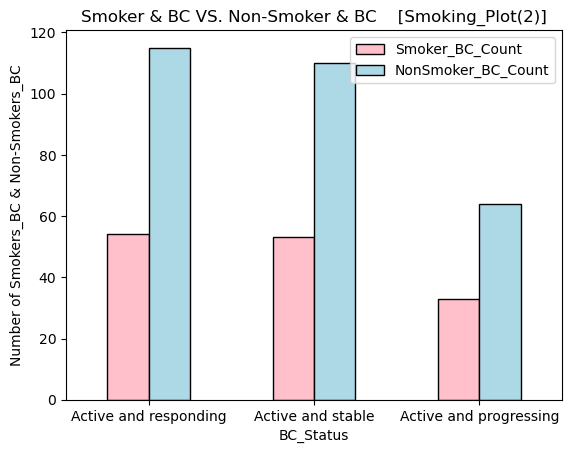

In [272]:
# Plotting
plt.style.use('seaborn-v0_8-pastel') # this would make the stype to be in a pastel color
Smoker_NonSmoker_BC_plot = Smoker_NonSmoker_BC_DF.plot.bar(rot=0, color = ["pink", "lightblue"], edgecolor = "black")
plt.title("Smoker & BC VS. Non-Smoker & BC    [Smoking_Plot(2)]")
plt.xlabel("BC_Status")
plt.ylabel("Number of Smokers_BC & Non-Smokers_BC")
# Save the figure
plt.savefig("Smoking_Output_Data/SmokingQ_Plot(2).png")

## Severity of COVID VS. Smoking Status

In [20]:
# Creating a data frame for the Severity of COVID and the smoking status
Covid_Smoking_df = pd.DataFrame(raw_data[["der_smoking2", "severity_of_covid_19_v2"]])
Covid_Smoking_df

,der_smoking2,severity_of_covid_19_v2
0,Current or Former,Severe
1,Never,Mild
2,Never,Moderate
3,Never,Moderate
4,Never,Mild
...,...,...
1378,Current or Former,Mild
1379,Never,Moderate
1380,Never,Mild
1381,Never,Moderate


In [21]:
# Cleaning the empty cells 
Covid_Smoking_df = Covid_Smoking_df.dropna()
Covid_Smoking_df.sample(20)

,der_smoking2,severity_of_covid_19_v2
93,Never,Mild
459,Never,Mild
879,Current or Former,Mild
109,Current or Former,Mild
169,Never,Mild
903,Never,Moderate
866,Current or Former,Mild
1060,Never,Moderate
212,Current or Former,Moderate
784,Never,Mild


In [22]:
# Creating an empty list to hold the values for smoker individuals with different severity of COVID
Smoker_Covid_Count = []

In [23]:
# Individuals who are smokers and their covid status is Mild
Smoker_Mild = Covid_Smoking_df.loc[(Covid_Smoking_df["der_smoking2"] == "Current or Former") & (Covid_Smoking_df["severity_of_covid_19_v2"] == "Mild")]
Smoker_Mild_Count = len(Smoker_Mild)
Smoker_Covid_Count.append(Smoker_Mild_Count)
print(Smoker_Covid_Count)

[281]


In [24]:
# Individuals who are smokers and their covid status is Moderate
Smoker_Moderate = Covid_Smoking_df.loc[(Covid_Smoking_df["der_smoking2"] == "Current or Former") & (Covid_Smoking_df["severity_of_covid_19_v2"] == "Moderate")]
Smoker_Moderate_Count = len(Smoker_Moderate)
Smoker_Covid_Count.append(Smoker_Moderate_Count)
print(Smoker_Covid_Count)

[281, 139]


In [25]:
# Individuals who are smokers and their covid status is Severe
Smoker_Severe = Covid_Smoking_df.loc[(Covid_Smoking_df["der_smoking2"] == "Current or Former") & (Covid_Smoking_df["severity_of_covid_19_v2"] == "Severe")]
Smoker_Severe_Count = len(Smoker_Severe)
Smoker_Covid_Count.append(Smoker_Severe_Count)
print(Smoker_Covid_Count)

[281, 139, 21]


In [26]:
# Creating an empty list to hold the values for non-smoker individuals with different severity of COVID
NonSmoker_Covid_Count = []

In [27]:
# Individuals who are smokers and their covid status is Mild
NonSmoker_Mild = Covid_Smoking_df.loc[(Covid_Smoking_df["der_smoking2"] == "Never") & (Covid_Smoking_df["severity_of_covid_19_v2"] == "Mild")]
NonSmoker_Mild_Count = len(NonSmoker_Mild)
NonSmoker_Covid_Count.append(NonSmoker_Mild_Count)
print(NonSmoker_Covid_Count)

[665]


In [28]:
# Individuals who are smokers and their covid status is Moderate
NonSmoker_Moderate = Covid_Smoking_df.loc[(Covid_Smoking_df["der_smoking2"] == "Never") & (Covid_Smoking_df["severity_of_covid_19_v2"] == "Moderate")]
NonSmoker_Moderate_Count = len(NonSmoker_Moderate)
NonSmoker_Covid_Count.append(NonSmoker_Moderate_Count)
print(NonSmoker_Covid_Count)

[665, 214]


In [29]:
# Individuals who are smokers and their covid status is Severe
NonSmoker_Severe = Covid_Smoking_df.loc[(Covid_Smoking_df["der_smoking2"] == "Never") & (Covid_Smoking_df["severity_of_covid_19_v2"] == "Severe")]
NonSmoker_Severe_Count = len(NonSmoker_Severe)
NonSmoker_Covid_Count.append(NonSmoker_Severe_Count)
print(NonSmoker_Covid_Count)

[665, 214, 31]


In [30]:
# Creating a data frame which includes both the Smoker_Covid_Count & NonSmoker_Covid_Count for comparison as well as plotting.
Covid_Status = ["Mild", "Moderate" , "Severe"]
Smoker_NonSmoker_Covid_DF = pd.DataFrame (
    {
        "Smoker_Covid_Count" : Smoker_Covid_Count,
        "NonSmoker_Covid_Count" : NonSmoker_Covid_Count},
        index = Covid_Status
    
)

Smoker_NonSmoker_Covid_DF

,Smoker_Covid_Count,NonSmoker_Covid_Count
Mild,281,665
Moderate,139,214
Severe,21,31


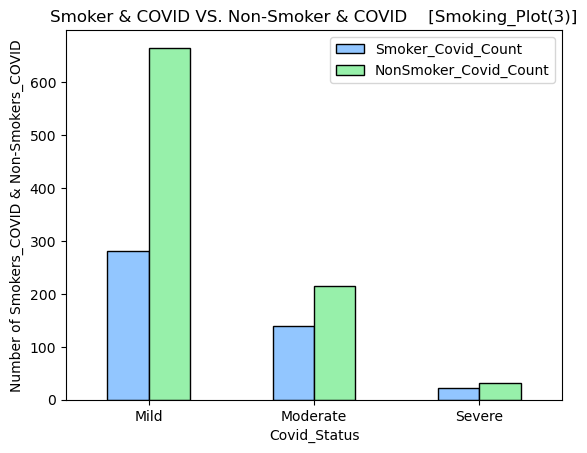

In [252]:
# Plotting
plt.style.use('seaborn-v0_8-pastel')
Smoker_NonSmoker_Covid_plot = Smoker_NonSmoker_Covid_DF.plot.bar(rot=0, edgecolor = "black")
plt.title("Smoker & COVID VS. Non-Smoker & COVID    [Smoking_Plot(3)]")
plt.xlabel("Covid_Status")
plt.ylabel("Number of Smokers_COVID & Non-Smokers_COVID")
# Save the figure
plt.savefig("Smoking_Output_Data/SmokingQ_Plot(3).png")

## Breast Cancer Status & Severity of COVID VS. Smoking Status

In [32]:
# Creating a data frame for the cancer status, Severity of COVID, and the smoking status
Cancer_Covid_Smoking_df = pd.DataFrame(raw_data[["der_smoking2", "der_cancer_status_v4", "severity_of_covid_19_v2"]])
Cancer_Covid_Smoking_df

,der_smoking2,der_cancer_status_v4,severity_of_covid_19_v2
0,Current or Former,Active and responding,Severe
1,Never,Active and stable,Mild
2,Never,NaN,Moderate
3,Never,Unknown,Moderate
4,Never,Active and responding,Mild
...,...,...,...
1378,Current or Former,Active and responding,Mild
1379,Never,Active and responding,Moderate
1380,Never,"Remission or no evidence of disease, >5 years",Mild
1381,Never,Unknown,Moderate


In [33]:
# Cleaning the empty cells 
Cancer_Covid_Smoking_df = Cancer_Covid_Smoking_df.dropna()
Cancer_Covid_Smoking_df.sample(20)

,der_smoking2,der_cancer_status_v4,severity_of_covid_19_v2
421,Never,"Remission or no evidence of disease, <5 years",Mild
100,Current or Former,"Remission or no evidence of disease, <5 years",Mild
650,Current or Former,Active and stable,Moderate
259,Current or Former,"Remission or no evidence of disease, >5 years",Mild
239,Never,"Remission or no evidence of disease, >5 years",Mild
631,Never,"Remission or no evidence of disease, <5 years",Mild
897,Never,"Remission or no evidence of disease, <5 years",Mild
927,Never,"Remission or no evidence of disease, >5 years",Mild
991,Never,"Remission or no evidence of disease, >5 years",Mild
415,Current or Former,Active and stable,Mild


In [143]:
# Smoker
# Mild Covid
# Creating an empty list to hold the values for smoker individuals with a mild COVID severity & different breast cancer status
Smoker_BC_MildCov_Count = []

In [144]:
# Individuals who are smokers and their covid status is Mild and their cancer status is Active and responding
Smoker_Mild_A_Responding = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Mild") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and responding")]
Smoker_Mild_A_Responding_Count = len(Smoker_Mild_A_Responding)
Smoker_BC_MildCov_Count.append(Smoker_Mild_A_Responding_Count)
print(Smoker_BC_MildCov_Count)

[35]


In [145]:
# Individuals who are smokers and their covid status is Mild and their cancer status is Active and stable
Smoker_Mild_A_stable = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Mild") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and stable")]
Smoker_Mild_A_stable_Count = len(Smoker_Mild_A_stable)
Smoker_BC_MildCov_Count.append(Smoker_Mild_A_stable_Count)
print(Smoker_BC_MildCov_Count)

[35, 37]


In [146]:
# Individuals who are smokers and their covid status is Mild and their cancer status is Active and progressing
Smoker_Mild_A_progressing = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Mild") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and progressing")]
Smoker_Mild_A_progressing_Count = len(Smoker_Mild_A_progressing)
Smoker_BC_MildCov_Count.append(Smoker_Mild_A_progressing_Count)
print(Smoker_BC_MildCov_Count)

[35, 37, 12]


In [147]:
# Smoker
# Moderate Covid
# Creating an empty list to hold the values for smoker individuals with a moderate COVID severity & different breast cancer status
Smoker_BC_ModerateCov_Count = []

In [148]:
# Individuals who are smokers and their covid status is Moderate and their cancer status is Active and responding
Smoker_Moderate_A_Responding = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Moderate") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and responding")]
Smoker_Moderate_A_Responding_Count = len(Smoker_Moderate_A_Responding)
Smoker_BC_ModerateCov_Count.append(Smoker_Moderate_A_Responding_Count)
print(Smoker_BC_ModerateCov_Count)

[17]


In [149]:
# Individuals who are smokers and their covid status is Moderate and their cancer status is Active and stable
Smoker_Moderate_A_stable = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Moderate") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and stable")]
Smoker_Moderate_A_stable_Count = len(Smoker_Moderate_A_stable)
Smoker_BC_ModerateCov_Count.append(Smoker_Moderate_A_stable_Count)
print(Smoker_BC_ModerateCov_Count)

[17, 15]


In [150]:
# Individuals who are smokers and their covid status is Moderate and their cancer status is Active and progressing
Smoker_Moderate_A_progressing = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Moderate") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and progressing")]
Smoker_Moderate_A_progressing_Count = len(Smoker_Moderate_A_progressing)
Smoker_BC_ModerateCov_Count.append(Smoker_Moderate_A_progressing_Count)
print(Smoker_BC_ModerateCov_Count)

[17, 15, 16]


In [151]:
# Smoker
# Severe Covid
# Creating an empty list to hold the values for smoker individuals with a severe COVID severity & different breast cancer status
Smoker_BC_SevereCov_Count = []

In [152]:
# Individuals who are smokers and their covid status is Severe and their cancer status is Active and responding
Smoker_Severe_A_Responding = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Severe") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and responding")]
Smoker_Severe_A_Responding_Count = len(Smoker_Severe_A_Responding)
Smoker_BC_SevereCov_Count.append(Smoker_Severe_A_Responding_Count)
print(Smoker_BC_SevereCov_Count)

[2]


In [153]:
# Individuals who are smokers and their covid status is Severe and their cancer status is Active and stable
Smoker_Severe_A_stable = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Severe") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and stable")]
Smoker_Severe_A_stable_Count = len(Smoker_Severe_A_stable)
Smoker_BC_SevereCov_Count.append(Smoker_Severe_A_stable_Count)
print(Smoker_BC_SevereCov_Count)

[2, 0]


In [154]:
# Individuals who are smokers and their covid status is Severe and their cancer status is Active and progressing
Smoker_Severe_A_progressing = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Severe") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and progressing")]
Smoker_Severe_A_progressing_Count = len(Smoker_Severe_A_progressing)
Smoker_BC_SevereCov_Count.append(Smoker_Severe_A_progressing_Count)
print(Smoker_BC_SevereCov_Count)

[2, 0, 5]


In [155]:
# Non-Smoker
# Mild Covid
# Creating an empty list to hold the values for non-smoker individuals with a mild COVID severity & different breast cancer status
NonSmoker_BC_MildCov_Count = []

In [156]:
# Individuals who are non-smokers and their covid status is Mild and their cancer status is Active and responding
NonSmoker_Mild_A_Responding = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Never") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Mild") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and responding")]
NonSmoker_Mild_A_Responding_Count = len(NonSmoker_Mild_A_Responding)
NonSmoker_BC_MildCov_Count.append(NonSmoker_Mild_A_Responding_Count)
print(NonSmoker_BC_MildCov_Count)

[86]


In [157]:
# Individuals who are non-smokers and their covid status is Mild and their cancer status is Active and stable
NonSmoker_Mild_A_stable = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Never") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Mild") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and stable")]
NonSmoker_Mild_A_stable_Count = len(NonSmoker_Mild_A_stable)
NonSmoker_BC_MildCov_Count.append(NonSmoker_Mild_A_stable_Count)
print(NonSmoker_BC_MildCov_Count)

[86, 82]


In [158]:
# Individuals who are non-smokers and their covid status is Mild and their cancer status is Active and progressing
NonSmoker_Mild_A_progressing = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Never") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Mild") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and progressing")]
NonSmoker_Mild_A_progressing_Count = len(NonSmoker_Mild_A_progressing)
NonSmoker_BC_MildCov_Count.append(NonSmoker_Mild_A_progressing_Count)
print(NonSmoker_BC_MildCov_Count)

[86, 82, 26]


In [159]:
# Non-Smoker
# Moderate Covid
# Creating an empty list to hold the values for non-smoker individuals with a moderate COVID severity & different breast cancer status
NonSmoker_BC_ModerateCov_Count = []

In [160]:
# Individuals who are non-smokers and their covid status is Moderate and their cancer status is Active and responding
NonSmoker_Moderate_A_Responding = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Never") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Moderate") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and responding")]
NonSmoker_Moderate_A_Responding_Count = len(NonSmoker_Moderate_A_Responding)
NonSmoker_BC_ModerateCov_Count.append(NonSmoker_Moderate_A_Responding_Count)
print(NonSmoker_BC_ModerateCov_Count)

[26]


In [161]:
# Individuals who are non-smokers and their covid status is Moderate and their cancer status is Active and stable
NonSmoker_Moderate_A_stable = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Never") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Moderate") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and stable")]
NonSmoker_Moderate_A_stable_Count = len(NonSmoker_Moderate_A_stable)
NonSmoker_BC_ModerateCov_Count.append(NonSmoker_Moderate_A_stable_Count)
print(NonSmoker_BC_ModerateCov_Count)

[26, 25]


In [162]:
# Individuals who are non-smokers and their covid status is Moderate and their cancer status is Active and progressing
NonSmoker_Moderate_A_progressing = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Never") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Moderate") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and progressing")]
NonSmoker_Moderate_A_progressing_Count = len(NonSmoker_Moderate_A_progressing)
NonSmoker_BC_ModerateCov_Count.append(NonSmoker_Moderate_A_progressing_Count)
print(NonSmoker_BC_ModerateCov_Count)

[26, 25, 33]


In [163]:
# Non-Smoker
# Severe Covid
# Creating an empty list to hold the values for non-smoker individuals with a severe COVID severity & different breast cancer status
NonSmoker_BC_SevereCov_Count = []

In [164]:
# Individuals who are non-smokers and their covid status is Severe and their cancer status is Active and responding
NonSmoker_Severe_A_Responding = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Never") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Severe") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and responding")]
NonSmoker_Severe_A_Responding_Count = len(NonSmoker_Severe_A_Responding)
NonSmoker_BC_SevereCov_Count.append(NonSmoker_Severe_A_Responding_Count)
print(NonSmoker_BC_SevereCov_Count)

[3]


In [165]:
# Individuals who are non-smokers and their covid status is Severe and their cancer status is Active and stable
NonSmoker_Severe_A_stable = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Never") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Severe") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and stable")]
NonSmoker_Severe_A_stable_Count = len(NonSmoker_Severe_A_stable)
NonSmoker_BC_SevereCov_Count.append(NonSmoker_Severe_A_stable_Count)
print(NonSmoker_BC_SevereCov_Count)

[3, 3]


In [166]:
# Individuals who are non-smokers and their covid status is Severe and their cancer status is Active and progressing
NonSmoker_Severe_A_progressing = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Never") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Severe") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and progressing")]
NonSmoker_Severe_A_progressing_Count = len(NonSmoker_Severe_A_progressing)
NonSmoker_BC_SevereCov_Count.append(NonSmoker_Severe_A_progressing_Count)
print(NonSmoker_BC_SevereCov_Count)

[3, 3, 5]


In [58]:
# Mild Covid
# Creating a data frame which includes both the Smoker_BC_MildCov_Count & NonSmoker_BC_MildCov_Count for comparison as well as plotting.
MildCov_BC_Status = ["Mild COVID & Active and responding", "Mild COVID &  Active and stable" , "Mild COVID & Active and progressing"]
    
MildCov_BC_Smoker_NonSmoker_DF = pd.DataFrame (
    {
        "Smoker_BC_MildCov_Count" : Smoker_BC_MildCov_Count,
        "NonSmoker_BC_MildCov_Count" : NonSmoker_BC_MildCov_Count},
        index = MildCov_BC_Status
    
)

MildCov_BC_Smoker_NonSmoker_DF

,Smoker_BC_MildCov_Count,NonSmoker_BC_MildCov_Count
Mild COVID & Active and responding,35,86
Mild COVID & Active and stable,37,82
Mild COVID & Active and progressing,12,26


In [59]:
# Moderate Covid
# Creating a data frame which includes both the Smoker_BC_ModerateCov_Count & NonSmoker_BC_ModerateCov_Count for comparison as well as plotting.
ModerateCov_BC_Status = ["Moderate COVID & Active and responding", "Moderate COVID &  Active and stable" , "Moderate COVID & Active and progressing"]

ModerateCov_BC_Smoker_NonSmoker_DF = pd.DataFrame (
    {
        "Smoker_BC_ModerateCov_Count" : Smoker_BC_ModerateCov_Count,
        "NonSmoker_BC_ModerateCov_Count" : NonSmoker_BC_ModerateCov_Count},
        index = ModerateCov_BC_Status
    
)

ModerateCov_BC_Smoker_NonSmoker_DF

,Smoker_BC_ModerateCov_Count,NonSmoker_BC_ModerateCov_Count
Moderate COVID & Active and responding,17,26
Moderate COVID & Active and stable,15,25
Moderate COVID & Active and progressing,16,33


In [60]:
# Severe Covid
# Creating a data frame which includes both the Smoker_BC_SevereCov_Count & NonSmoker_BC_SevereCov_Count for comparison as well as plotting.
SevereCov_BC_Status = ["Severe COVID & Active and responding", "Severe COVID &  Active and stable" , "Severe COVID & Active and progressing"]

SevereCov_BC_Smoker_NonSmoker_DF = pd.DataFrame (
    {
        "Smoker_BC_SevereCov_Count" : Smoker_BC_SevereCov_Count,
        "NonSmoker_BC_SevereCov_Count" : NonSmoker_BC_SevereCov_Count},
        index = SevereCov_BC_Status
    
)

SevereCov_BC_Smoker_NonSmoker_DF

,Smoker_BC_SevereCov_Count,NonSmoker_BC_SevereCov_Count
Severe COVID & Active and responding,2,3
Severe COVID & Active and stable,0,3
Severe COVID & Active and progressing,5,5


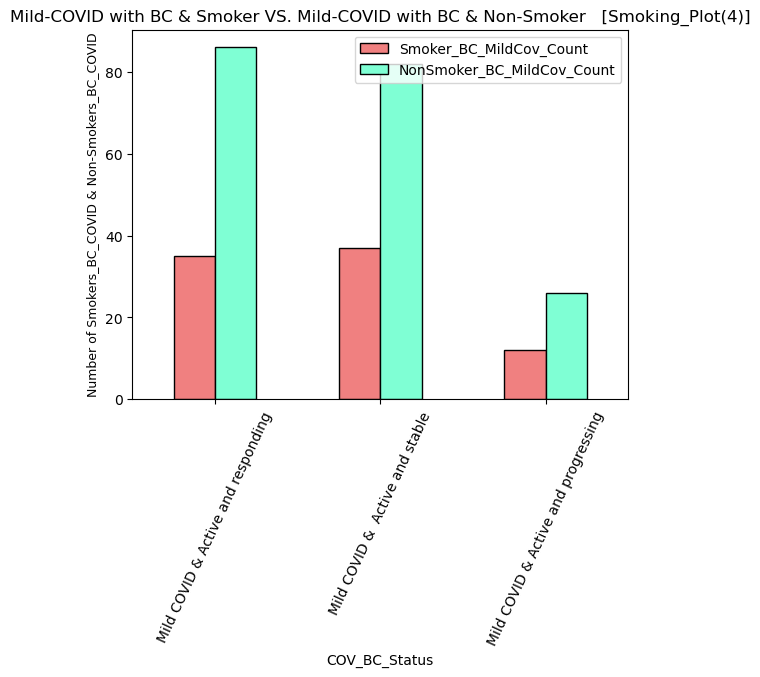

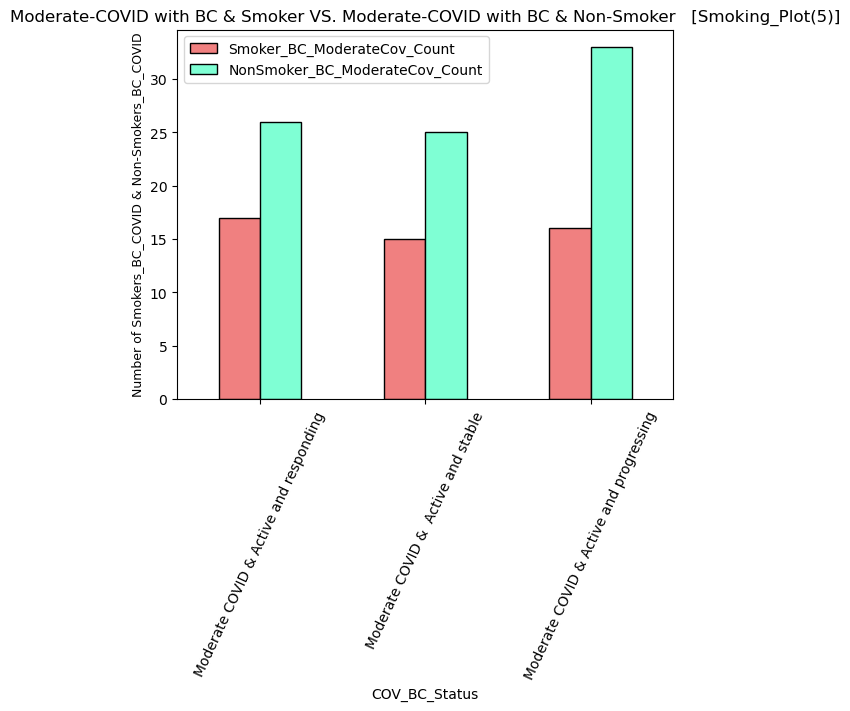

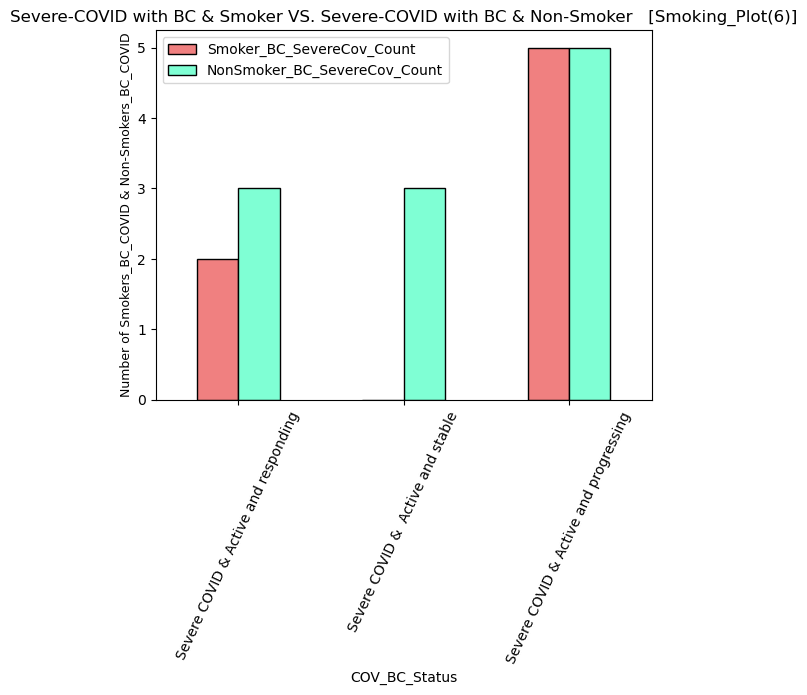

In [251]:
# Plotting



# Mild COVID
plt.style.use('seaborn-v0_8-pastel')
COV_BC_Smoker_NonSmoker_plot = MildCov_BC_Smoker_NonSmoker_DF.plot.bar(rot=65, color = ["lightcoral","aquamarine"], edgecolor = "black")
plt.title("Mild-COVID with BC & Smoker VS. Mild-COVID with BC & Non-Smoker   [Smoking_Plot(4)]")
plt.xlabel("COV_BC_Status")
plt.ylabel("Number of Smokers_BC_COVID & Non-Smokers_BC_COVID", fontsize=9) 
# Save the figure
plt.savefig("Smoking_Output_Data/SmokingQ_Plot(4).png", bbox_inches="tight") # this would avoid the graphs to be cut-off when they are saved.

# Moderate COVID
plt.style.use('seaborn-v0_8-pastel')
COV_BC_Smoker_NonSmoker_plot = ModerateCov_BC_Smoker_NonSmoker_DF.plot.bar(rot=65, color = ["lightcoral","aquamarine"], edgecolor = "black")
plt.title("Moderate-COVID with BC & Smoker VS. Moderate-COVID with BC & Non-Smoker   [Smoking_Plot(5)]")
plt.xlabel("COV_BC_Status")
plt.ylabel("Number of Smokers_BC_COVID & Non-Smokers_BC_COVID", fontsize=9)
# Save the figure
plt.savefig("Smoking_Output_Data/SmokingQ_Plot(5).png", bbox_inches="tight")

# Severe COVID
plt.style.use('seaborn-v0_8-pastel')
COV_BC_Smoker_NonSmoker_plot = SevereCov_BC_Smoker_NonSmoker_DF.plot.bar(rot=65, color = ["lightcoral","aquamarine"], edgecolor = "black")
plt.title("Severe-COVID with BC & Smoker VS. Severe-COVID with BC & Non-Smoker   [Smoking_Plot(6)]")
plt.xlabel("COV_BC_Status")
plt.ylabel("Number of Smokers_BC_COVID & Non-Smokers_BC_COVID", fontsize=9)
# Save the figure
plt.savefig("Smoking_Output_Data/SmokingQ_Plot(6).png", bbox_inches="tight")

In [276]:
# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(SevereCov_BC_Smoker_NonSmoker_DF)

# Display test results
print("\nChi-squared statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

# Check the significance level (e.g., 0.05)
alpha = 0.05

# Make a decision based on the p-value
if p < alpha:
    print("\nReject the null hypothesis. There is a significant relationship.")
else:
    print("\nFail to reject the null hypothesis. There is no significant relationship.")


Chi-squared statistic: 2.4311688311688315
P-value: 0.29653666299717335
Degrees of freedom: 2
Expected frequencies:
[[1.94444444 3.05555556]
 [1.16666667 1.83333333]
 [3.88888889 6.11111111]]

Fail to reject the null hypothesis. There is no significant relationship.


Analysis: Since the p-value is greater than 0.05, we cannot reject the null hypothesis. This means that there is no significant 
difference between the two data sets. Therefore, individuals who smoke and have Breast Cancer do not have a higher chance of having a severe COVID compared to the individuals who do not smoke.

# Overall Analysis

In order to answer this question, a step by step procedure was taken. First, the overall smoking status over the entire data set was analyzed. The data was isolated and cleaned for the smoking status only. This led to a bar graph to be created to display the differences between the individuals who ever have smoked in their life and the individuals who never have smoked in their life. The Smoking_Plot(1) displays that in our dataset, the number of people who has never smoked in their life is higher than the number of people who are either a current or former smokers. Next, the number of individuals who had breast cancer at the time of COVID-19 diagnosis and the smoking status was analyzed. The data was isolated and cleaned for this purpose. Then, a dataframe was created in order to create another bar graph called Smoking_Plot(2) to be able to compare the outcomes. Refering to this plot, the number of non-smoker individuals for all three breast cancer statuses (Active and responding, Active and stable, Active and progressing) was higher than the number of smokers, showing that the smoking status did not have an effect on the breast cancer statuses. Next, the severity of COVID-19 was compared to the smoking status. The data was isolated and cleaned for this purpose. Then a dataframe was created in order to create a bar graph called Smoking_Plot(3) to be able to compare the outcomes. Refering to this plot, the number of non-smoker individuals for all three COVID-19 severity types (Mild, Moderate, Severe) was higher than the number of smokers, showing that being a smoker does not have an effect on the severity of COVID-19. Lastly, the breast cancer statuses and the severity of COVID-19 were compared to the smoking status to check if being a smoker for the individuals with different type of breast cancer has an effect on the severity of the COVID-19. For this purpose, the data was isolated and cleaned. Then, three different dataframes were created for each severity of COVID-19. Each dataframe compares the severity of COVID-19 and the three statuses of breast cancer with the smoking status. Plots Smoking_Plot(4), Smoking_Plot(5), and Smoking_Plot(6) display the results. Refering to these plots, it can be concluded that being a smoker while having a breast cancer, does not have an effect on the COVID-19 severity.

The hypothesis for this experiment was that "Individuals who smoke and have Breast Cancer have a higher chance of having a severe COVID compared to the individuals who do not smoke". However, looking at the bar graphs and with the analysis which was done, it could be seen that smoking does not have an effect on COVID-19 severity for individuals with breast cancer. A hypothesis testing called chi-squared was also done to test the hypothesis. Two different groups of smokers and non-smokers for severe type of COVID-19 for individuals with breast cancer were tested. This resulted in a p-value of 0.30 which is greater that 0.05. Therefore, the null hypothesis cannot be rejected and it can be concluded that there is no significant difference between the two data sets and as a result, individuals who smoke and have Breast Cancer do not have a higher chance of having a severe COVID compared to the individuals who do not smoke.

# Q3: Amongst all the races with different BC statuses, is smoking a factor for them to have COVID? 

Hypothesis: Amongst all the races with different breast cancer statuses, smoking is a factor for them to have COVID.

## Breast Cancer Status & Race/Ethnicity VS. Smoking Status for All kinds of COVID Severity

In [62]:
# Creating a data frame for the cancer status, Severity of COVID, Race/Ethnicity, and the smoking status
Cancer_Covid_Race_Smoking_df = pd.DataFrame(raw_data[["der_smoking2", "der_cancer_status_v4", "severity_of_covid_19_v2", "der_race_v2"]])
Cancer_Covid_Race_Smoking_df

,der_smoking2,der_cancer_status_v4,severity_of_covid_19_v2,der_race_v2
0,Current or Former,Active and responding,Severe,Non-Hispanic White
1,Never,Active and stable,Mild,Hispanic
2,Never,NaN,Moderate,Hispanic
3,Never,Unknown,Moderate,Other
4,Never,Active and responding,Mild,Hispanic
...,...,...,...,...
1378,Current or Former,Active and responding,Mild,Other
1379,Never,Active and responding,Moderate,Non-Hispanic Black
1380,Never,"Remission or no evidence of disease, >5 years",Mild,Non-Hispanic White
1381,Never,Unknown,Moderate,Non-Hispanic Black


In [63]:
# Cleaning the empty cells 
Cancer_Covid_Race_Smoking_df = Cancer_Covid_Race_Smoking_df.dropna()
Cancer_Covid_Race_Smoking_df

,der_smoking2,der_cancer_status_v4,severity_of_covid_19_v2,der_race_v2
0,Current or Former,Active and responding,Severe,Non-Hispanic White
1,Never,Active and stable,Mild,Hispanic
3,Never,Unknown,Moderate,Other
4,Never,Active and responding,Mild,Hispanic
6,Never,Active and stable,Mild,Non-Hispanic White
...,...,...,...,...
1378,Current or Former,Active and responding,Mild,Other
1379,Never,Active and responding,Moderate,Non-Hispanic Black
1380,Never,"Remission or no evidence of disease, >5 years",Mild,Non-Hispanic White
1381,Never,Unknown,Moderate,Non-Hispanic Black


In [167]:
# Smoker
# Active and responding
# Creating an empty list to hold the values for smoker individuals with Active and responding BC & different race/ethnicity categories
Smoker_A_Res_Count = []

In [168]:
# Individuals who are smokers, their cancer status is Active and responding, and are Non-Hispanic White
Smoker_A_Res_NHW = Cancer_Covid_Race_Smoking_df.loc[(Cancer_Covid_Race_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Covid_Race_Smoking_df["der_cancer_status_v4"] == "Active and responding")
                                                          & (Cancer_Covid_Race_Smoking_df["der_race_v2"] == "Non-Hispanic White")]
Smoker_A_Res_NHW_Count = len(Smoker_A_Res_NHW)
Smoker_A_Res_Count.append(Smoker_A_Res_NHW_Count)
print(Smoker_A_Res_Count)

[29]


In [169]:
# Individuals who are smokers, their cancer status is Active and responding, and are Non-Hispanic Black
Smoker_A_Responding_B = Cancer_Covid_Race_Smoking_df.loc[(Cancer_Covid_Race_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Covid_Race_Smoking_df["der_cancer_status_v4"] == "Active and responding")
                                                          & (Cancer_Covid_Race_Smoking_df["der_race_v2"] == "Non-Hispanic Black")]
Smoker_A_Responding_B_Count = len(Smoker_A_Responding_B)
Smoker_A_Res_Count.append(Smoker_A_Responding_B_Count)
print(Smoker_A_Res_Count)

[29, 11]


In [170]:
# Individuals who are smokers, their cancer status is Active and responding, and are Hispanic
Smoker_A_Responding_H = Cancer_Covid_Race_Smoking_df.loc[(Cancer_Covid_Race_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Covid_Race_Smoking_df["der_cancer_status_v4"] == "Active and responding")
                                                          & (Cancer_Covid_Race_Smoking_df["der_race_v2"] == "Hispanic")]
Smoker_A_Responding_H_Count = len(Smoker_A_Responding_H)
Smoker_A_Res_Count.append(Smoker_A_Responding_H_Count)
print(Smoker_A_Res_Count)

[29, 11, 9]


In [171]:
# Individuals who are smokers, their cancer status is Active and responding, and are Non-Hispanic AAPI
Smoker_A_Responding_AAPI = Cancer_Covid_Race_Smoking_df.loc[(Cancer_Covid_Race_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Covid_Race_Smoking_df["der_cancer_status_v4"] == "Active and responding")
                                                          & (Cancer_Covid_Race_Smoking_df["der_race_v2"] == "Non-Hispanic AAPI")]
Smoker_A_Responding_AAPI_Count = len(Smoker_A_Responding_AAPI)
Smoker_A_Res_Count.append(Smoker_A_Responding_AAPI_Count)
print(Smoker_A_Res_Count)

[29, 11, 9, 1]


In [172]:
# Individuals who are smokers, their cancer status is Active and responding, and their race is Other
Smoker_A_Responding_O = Cancer_Covid_Race_Smoking_df.loc[(Cancer_Covid_Race_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Covid_Race_Smoking_df["der_cancer_status_v4"] == "Active and responding")
                                                          & (Cancer_Covid_Race_Smoking_df["der_race_v2"] == "Other")]
Smoker_A_Responding_O_Count = len(Smoker_A_Responding_O)
Smoker_A_Res_Count.append(Smoker_A_Responding_O_Count)
print(Smoker_A_Res_Count)

[29, 11, 9, 1, 4]


In [176]:
# Smoker
# Active and stable
# Creating an empty list to hold the values for smoker individuals with Active and stable BC & different race/ethnicity categories
Smoker_A_St_Count = []

In [177]:
# Individuals who are smokers, their cancer status is Active and stable, and are Non-Hispanic White
Smoker_A_St_NHW = Cancer_Covid_Race_Smoking_df.loc[(Cancer_Covid_Race_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Covid_Race_Smoking_df["der_cancer_status_v4"] == "Active and stable")
                                                          & (Cancer_Covid_Race_Smoking_df["der_race_v2"] == "Non-Hispanic White")]
Smoker_A_St_NHW_Count = len(Smoker_A_St_NHW)
Smoker_A_St_Count.append(Smoker_A_St_NHW_Count)
print(Smoker_A_St_Count)

[33]


In [178]:
# Individuals who are smokers, their cancer status is Active and stable, and are Non-Hispanic Black
Smoker_A_St_B = Cancer_Covid_Race_Smoking_df.loc[(Cancer_Covid_Race_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Covid_Race_Smoking_df["der_cancer_status_v4"] == "Active and stable")
                                                          & (Cancer_Covid_Race_Smoking_df["der_race_v2"] == "Non-Hispanic Black")]
Smoker_A_St_B_Count = len(Smoker_A_St_B)
Smoker_A_St_Count.append(Smoker_A_St_B_Count)
print(Smoker_A_St_Count)

[33, 6]


In [179]:
# Individuals who are smokers, their cancer status is Active and stable, and are Hispanic
Smoker_A_St_H = Cancer_Covid_Race_Smoking_df.loc[(Cancer_Covid_Race_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Covid_Race_Smoking_df["der_cancer_status_v4"] == "Active and stable")
                                                          & (Cancer_Covid_Race_Smoking_df["der_race_v2"] == "Hispanic")]
Smoker_A_St_H_Count = len(Smoker_A_St_H)
Smoker_A_St_Count.append(Smoker_A_St_H_Count)
print(Smoker_A_St_Count)

[33, 6, 10]


In [180]:
# Individuals who are smokers, their cancer status is Active and stable, and are Non-Hispanic AAPI
Smoker_A_St_AAPI = Cancer_Covid_Race_Smoking_df.loc[(Cancer_Covid_Race_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Covid_Race_Smoking_df["der_cancer_status_v4"] == "Active and stable")
                                                          & (Cancer_Covid_Race_Smoking_df["der_race_v2"] == "Non-Hispanic AAPI")]
Smoker_A_St_AAPI_Count = len(Smoker_A_St_AAPI)
Smoker_A_St_Count.append(Smoker_A_St_AAPI_Count)
print(Smoker_A_St_Count)

[33, 6, 10, 1]


In [181]:
# Individuals who are smokers, their cancer status is Active and stable, and their race is Other
Smoker_A_St_O = Cancer_Covid_Race_Smoking_df.loc[(Cancer_Covid_Race_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Covid_Race_Smoking_df["der_cancer_status_v4"] == "Active and stable")
                                                          & (Cancer_Covid_Race_Smoking_df["der_race_v2"] == "Other")]
Smoker_A_St_O_Count = len(Smoker_A_St_O)
Smoker_A_St_Count.append(Smoker_A_St_O_Count)
print(Smoker_A_St_Count)

[33, 6, 10, 1, 2]


In [186]:
# Smoker
# Active and progressing
# Creating an empty list to hold the values for smoker individuals with Active and stable BC & different race/ethnicity categories
Smoker_A_Prog_Count = []

In [187]:
# Individuals who are smokers, their cancer status is Active and progressing, and are Non-Hispanic White
Smoker_A_Prog_NHW = Cancer_Covid_Race_Smoking_df.loc[(Cancer_Covid_Race_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Covid_Race_Smoking_df["der_cancer_status_v4"] == "Active and progressing")
                                                          & (Cancer_Covid_Race_Smoking_df["der_race_v2"] == "Non-Hispanic White")]
Smoker_A_Prog_NHW_Count = len(Smoker_A_Prog_NHW)
Smoker_A_Prog_Count.append(Smoker_A_Prog_NHW_Count)
print(Smoker_A_Prog_Count)

[16]


In [188]:
# Individuals who are smokers, their cancer status is Active and progressing, and are Non-Hispanic Black
Smoker_A_Prog_B = Cancer_Covid_Race_Smoking_df.loc[(Cancer_Covid_Race_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Covid_Race_Smoking_df["der_cancer_status_v4"] == "Active and progressing")
                                                          & (Cancer_Covid_Race_Smoking_df["der_race_v2"] == "Non-Hispanic Black")]
Smoker_A_Prog_B_Count = len(Smoker_A_Prog_B)
Smoker_A_Prog_Count.append(Smoker_A_Prog_B_Count)
print(Smoker_A_Prog_Count)

[16, 10]


In [189]:
# Individuals who are smokers, their cancer status is Active and progressing, and are Hispanic
Smoker_A_Prog_H = Cancer_Covid_Race_Smoking_df.loc[(Cancer_Covid_Race_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Covid_Race_Smoking_df["der_cancer_status_v4"] == "Active and progressing")
                                                          & (Cancer_Covid_Race_Smoking_df["der_race_v2"] == "Hispanic")]
Smoker_A_Prog_H_Count = len(Smoker_A_Prog_H)
Smoker_A_Prog_Count.append(Smoker_A_Prog_H_Count)
print(Smoker_A_Prog_Count)

[16, 10, 6]


In [190]:
# Individuals who are smokers, their cancer status is Active and progressing, and are Non-Hispanic AAPI
Smoker_A_Prog_AAPI = Cancer_Covid_Race_Smoking_df.loc[(Cancer_Covid_Race_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Covid_Race_Smoking_df["der_cancer_status_v4"] == "Active and progressing")
                                                          & (Cancer_Covid_Race_Smoking_df["der_race_v2"] == "Non-Hispanic AAPI")]
Smoker_A_Prog_AAPI_Count = len(Smoker_A_Prog_AAPI)
Smoker_A_Prog_Count.append(Smoker_A_Prog_AAPI_Count)
print(Smoker_A_Prog_Count)

[16, 10, 6, 1]


In [191]:
# Individuals who are smokers, their cancer status is Active and progressing, and their race is Other
Smoker_A_Prog_O = Cancer_Covid_Race_Smoking_df.loc[(Cancer_Covid_Race_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Covid_Race_Smoking_df["der_cancer_status_v4"] == "Active and progressing")
                                                          & (Cancer_Covid_Race_Smoking_df["der_race_v2"] == "Other")]
Smoker_A_Prog_O_Count = len(Smoker_A_Prog_O)
Smoker_A_Prog_Count.append(Smoker_A_Prog_O_Count)
print(Smoker_A_Prog_Count)

[16, 10, 6, 1, 0]


In [192]:
# Non-Smoker
# Active and responding
# Creating an empty list to hold the values for non-smoker individuals with Active and responding BC & different race/ethnicity categories
NonSmoker_A_Res_Count = []

In [193]:
# Individuals who are non-smokers, their cancer status is Active and responding, and are Non-Hispanic White
NonSmoker_A_Res_NHW = Cancer_Covid_Race_Smoking_df.loc[(Cancer_Covid_Race_Smoking_df["der_smoking2"] == "Never") & (Cancer_Covid_Race_Smoking_df["der_cancer_status_v4"] == "Active and responding")
                                                          & (Cancer_Covid_Race_Smoking_df["der_race_v2"] == "Non-Hispanic White")]
NonSmoker_A_Res_NHW_Count = len(NonSmoker_A_Res_NHW)
NonSmoker_A_Res_Count.append(NonSmoker_A_Res_NHW_Count)
print(NonSmoker_A_Res_Count)

[38]


In [194]:
# Individuals who are non-smokers, their cancer status is Active and responding, and are Non-Hispanic Black
NonSmoker_A_Responding_B = Cancer_Covid_Race_Smoking_df.loc[(Cancer_Covid_Race_Smoking_df["der_smoking2"] == "Never") & (Cancer_Covid_Race_Smoking_df["der_cancer_status_v4"] == "Active and responding")
                                                          & (Cancer_Covid_Race_Smoking_df["der_race_v2"] == "Non-Hispanic Black")]
NonSmoker_A_Responding_B_Count = len(NonSmoker_A_Responding_B)
NonSmoker_A_Res_Count.append(NonSmoker_A_Responding_B_Count)
print(NonSmoker_A_Res_Count)

[38, 21]


In [195]:
# Individuals who are non-smokers, their cancer status is Active and responding, and are Hispanic
NonSmoker_A_Responding_H = Cancer_Covid_Race_Smoking_df.loc[(Cancer_Covid_Race_Smoking_df["der_smoking2"] == "Never") & (Cancer_Covid_Race_Smoking_df["der_cancer_status_v4"] == "Active and responding")
                                                          & (Cancer_Covid_Race_Smoking_df["der_race_v2"] == "Hispanic")]
NonSmoker_A_Responding_H_Count = len(NonSmoker_A_Responding_H)
NonSmoker_A_Res_Count.append(NonSmoker_A_Responding_H_Count)
print(NonSmoker_A_Res_Count)

[38, 21, 47]


In [196]:
# Individuals who are non-smokers, their cancer status is Active and responding, and are Non-Hispanic AAPI
NonSmoker_A_Responding_AAPI = Cancer_Covid_Race_Smoking_df.loc[(Cancer_Covid_Race_Smoking_df["der_smoking2"] == "Never") & (Cancer_Covid_Race_Smoking_df["der_cancer_status_v4"] == "Active and responding")
                                                          & (Cancer_Covid_Race_Smoking_df["der_race_v2"] == "Non-Hispanic AAPI")]
NonSmoker_A_Responding_AAPI_Count = len(NonSmoker_A_Responding_AAPI)
NonSmoker_A_Res_Count.append(NonSmoker_A_Responding_AAPI_Count)
print(NonSmoker_A_Res_Count)

[38, 21, 47, 2]


In [197]:
# Individuals who are non-smokers, their cancer status is Active and responding, and their race is Other
NonSmoker_A_Responding_O = Cancer_Covid_Race_Smoking_df.loc[(Cancer_Covid_Race_Smoking_df["der_smoking2"] == "Never") & (Cancer_Covid_Race_Smoking_df["der_cancer_status_v4"] == "Active and responding")
                                                          & (Cancer_Covid_Race_Smoking_df["der_race_v2"] == "Other")]
NonSmoker_A_Responding_O_Count = len(NonSmoker_A_Responding_O)
NonSmoker_A_Res_Count.append(NonSmoker_A_Responding_O_Count)
print(NonSmoker_A_Res_Count)

[38, 21, 47, 2, 7]


In [198]:
# Non-Smoker
# Active and stable
# Creating an empty list to hold the values for non-smoker individuals with Active and stable BC & different race/ethnicity categories
NonSmoker_A_St_Count = []

In [199]:
# Individuals who are non-smokers, their cancer status is Active and stable, and are Non-Hispanic White
NonSmoker_A_St_NHW = Cancer_Covid_Race_Smoking_df.loc[(Cancer_Covid_Race_Smoking_df["der_smoking2"] == "Never") & (Cancer_Covid_Race_Smoking_df["der_cancer_status_v4"] == "Active and stable")
                                                          & (Cancer_Covid_Race_Smoking_df["der_race_v2"] == "Non-Hispanic White")]
NonSmoker_A_St_NHW_Count = len(NonSmoker_A_St_NHW)
NonSmoker_A_St_Count.append(NonSmoker_A_St_NHW_Count)
print(NonSmoker_A_St_Count)

[54]


In [200]:
# Individuals who are non-smokers, their cancer status is Active and stable, and are Non-Hispanic Black
NonSmoker_A_St_B = Cancer_Covid_Race_Smoking_df.loc[(Cancer_Covid_Race_Smoking_df["der_smoking2"] == "Never") & (Cancer_Covid_Race_Smoking_df["der_cancer_status_v4"] == "Active and stable")
                                                          & (Cancer_Covid_Race_Smoking_df["der_race_v2"] == "Non-Hispanic Black")]
NonSmoker_A_St_B_Count = len(NonSmoker_A_St_B)
NonSmoker_A_St_Count.append(NonSmoker_A_St_B_Count)
print(NonSmoker_A_St_Count)

[54, 20]


In [201]:
# Individuals who are non-smokers, their cancer status is Active and stable, and are Hispanic
NonSmoker_A_St_H = Cancer_Covid_Race_Smoking_df.loc[(Cancer_Covid_Race_Smoking_df["der_smoking2"] == "Never") & (Cancer_Covid_Race_Smoking_df["der_cancer_status_v4"] == "Active and stable")
                                                          & (Cancer_Covid_Race_Smoking_df["der_race_v2"] == "Hispanic")]
NonSmoker_A_St_H_Count = len(NonSmoker_A_St_H)
NonSmoker_A_St_Count.append(NonSmoker_A_St_H_Count)
print(NonSmoker_A_St_Count)

[54, 20, 25]


In [202]:
# Individuals who are non-smokers, their cancer status is Active and stable, and are Non-Hispanic AAPI
NonSmoker_A_St_AAPI = Cancer_Covid_Race_Smoking_df.loc[(Cancer_Covid_Race_Smoking_df["der_smoking2"] == "Never") & (Cancer_Covid_Race_Smoking_df["der_cancer_status_v4"] == "Active and stable")
                                                          & (Cancer_Covid_Race_Smoking_df["der_race_v2"] == "Non-Hispanic AAPI")]
NonSmoker_A_St_AAPI_Count = len(NonSmoker_A_St_AAPI)
NonSmoker_A_St_Count.append(NonSmoker_A_St_AAPI_Count)
print(NonSmoker_A_St_Count)

[54, 20, 25, 8]


In [203]:
# Individuals who are non-smokers, their cancer status is Active and stable, and their race is Other
NonSmoker_A_St_O = Cancer_Covid_Race_Smoking_df.loc[(Cancer_Covid_Race_Smoking_df["der_smoking2"] == "Never") & (Cancer_Covid_Race_Smoking_df["der_cancer_status_v4"] == "Active and stable")
                                                          & (Cancer_Covid_Race_Smoking_df["der_race_v2"] == "Other")]
NonSmoker_A_St_O_Count = len(NonSmoker_A_St_O)
NonSmoker_A_St_Count.append(NonSmoker_A_St_O_Count)
print(NonSmoker_A_St_Count)

[54, 20, 25, 8, 3]


In [204]:
# Non-Smoker
# Active and progressing
# Creating an empty list to hold the values for non-smoker individuals with Active and stable BC & different race/ethnicity categories
NonSmoker_A_Prog_Count = []

In [205]:
# Individuals who are non-smokers, their cancer status is Active and progressing, and are Non-Hispanic White
NonSmoker_A_Prog_NHW = Cancer_Covid_Race_Smoking_df.loc[(Cancer_Covid_Race_Smoking_df["der_smoking2"] == "Never") & (Cancer_Covid_Race_Smoking_df["der_cancer_status_v4"] == "Active and progressing")
                                                          & (Cancer_Covid_Race_Smoking_df["der_race_v2"] == "Non-Hispanic White")]
NonSmoker_A_Prog_NHW_Count = len(NonSmoker_A_Prog_NHW)
NonSmoker_A_Prog_Count.append(NonSmoker_A_Prog_NHW_Count)
print(NonSmoker_A_Prog_Count)

[25]


In [206]:
# Individuals who are non-smokers, their cancer status is Active and progressing, and are Non-Hispanic Black
NonSmoker_A_Prog_B = Cancer_Covid_Race_Smoking_df.loc[(Cancer_Covid_Race_Smoking_df["der_smoking2"] == "Never") & (Cancer_Covid_Race_Smoking_df["der_cancer_status_v4"] == "Active and progressing")
                                                          & (Cancer_Covid_Race_Smoking_df["der_race_v2"] == "Non-Hispanic Black")]
NonSmoker_A_Prog_B_Count = len(NonSmoker_A_Prog_B)
NonSmoker_A_Prog_Count.append(NonSmoker_A_Prog_B_Count)
print(NonSmoker_A_Prog_Count)

[25, 17]


In [207]:
# Individuals who are non-smokers, their cancer status is Active and progressing, and are Hispanic
NonSmoker_A_Prog_H = Cancer_Covid_Race_Smoking_df.loc[(Cancer_Covid_Race_Smoking_df["der_smoking2"] == "Never") & (Cancer_Covid_Race_Smoking_df["der_cancer_status_v4"] == "Active and progressing")
                                                          & (Cancer_Covid_Race_Smoking_df["der_race_v2"] == "Hispanic")]
NonSmoker_A_Prog_H_Count = len(NonSmoker_A_Prog_H)
NonSmoker_A_Prog_Count.append(NonSmoker_A_Prog_H_Count)
print(NonSmoker_A_Prog_Count)

[25, 17, 14]


In [208]:
# Individuals who are non-smokers, their cancer status is Active and progressing, and are Non-Hispanic AAPI
NonSmoker_A_Prog_AAPI = Cancer_Covid_Race_Smoking_df.loc[(Cancer_Covid_Race_Smoking_df["der_smoking2"] == "Never") & (Cancer_Covid_Race_Smoking_df["der_cancer_status_v4"] == "Active and progressing")
                                                          & (Cancer_Covid_Race_Smoking_df["der_race_v2"] == "Non-Hispanic AAPI")]
NonSmoker_A_Prog_AAPI_Count = len(NonSmoker_A_Prog_AAPI)
NonSmoker_A_Prog_Count.append(NonSmoker_A_Prog_AAPI_Count)
print(NonSmoker_A_Prog_Count)

[25, 17, 14, 5]


In [209]:
# Individuals who are non-smokers, their cancer status is Active and progressing, and their race is Other
NonSmoker_A_Prog_O = Cancer_Covid_Race_Smoking_df.loc[(Cancer_Covid_Race_Smoking_df["der_smoking2"] == "Never") & (Cancer_Covid_Race_Smoking_df["der_cancer_status_v4"] == "Active and progressing")
                                                          & (Cancer_Covid_Race_Smoking_df["der_race_v2"] == "Other")]
NonSmoker_A_Prog_O_Count = len(NonSmoker_A_Prog_O)
NonSmoker_A_Prog_Count.append(NonSmoker_A_Prog_O_Count)
print(NonSmoker_A_Prog_Count)

[25, 17, 14, 5, 3]


In [138]:
# Active and responding BC
# Creating a data frame which includes both the Smoker_A_Res_Count & NonSmoker_A_Res_Count for comparison as well as plotting.
# NHW = Non-Hispanic White
# AAPI = Asian Americans and Pacific Islanders
Race_Ethnicity = ["NHW", "Black" , "Hispanic", "AAPI", "Others"]
   
A_Res_BC_Smoker_NonSmoker_DF = pd.DataFrame (
    {
        "Smoker_A_Res_Count" : Smoker_A_Res_Count,
        "NonSmoker_A_Res_Count" : NonSmoker_A_Res_Count},
        index = Race_Ethnicity
    
)

A_Res_BC_Smoker_NonSmoker_DF

,Smoker_A_Res_Count,NonSmoker_A_Res_Count
NHW,29,38
Black,11,21
Hispanic,9,47
AAPI,1,2
Others,4,7


In [136]:
# Active and stable BC
# Creating a data frame which includes both the Smoker_A_St_Count & NonSmoker_A_St_Count for comparison as well as plotting.
# NHW = Non-Hispanic White
# AAPI = Asian Americans and Pacific Islanders
Race_Ethnicity = ["NHW", "Black" , "Hispanic", "AAPI", "Others"]
    
A_St_BC_Smoker_NonSmoker_DF = pd.DataFrame (
    {
        "Smoker_A_St_Count" : Smoker_A_St_Count,
        "NonSmoker_A_St_Count" : NonSmoker_A_St_Count},
        index = Race_Ethnicity
    
)

A_St_BC_Smoker_NonSmoker_DF

,Smoker_A_St_Count,NonSmoker_A_St_Count
NHW,33,54
Black,6,20
Hispanic,10,25
AAPI,1,8
Others,2,3


In [135]:
# Active and progressing BC
# Creating a data frame which includes both the Smoker_A_Prog_Count & NonSmoker_A_Prog_Count for comparison as well as plotting.
# NHW = Non-Hispanic White
# AAPI = Asian Americans and Pacific Islanders
Race_Ethnicity = ["NHW", "Black" , "Hispanic", "AAPI", "Others"]
    
A_Prog_BC_Smoker_NonSmoker_DF = pd.DataFrame (
    {
        "Smoker_A_Prog_Count" : Smoker_A_Prog_Count,
        "NonSmoker_A_Prog_Count" : NonSmoker_A_Prog_Count},
        index = Race_Ethnicity
    
)

A_Prog_BC_Smoker_NonSmoker_DF

,Smoker_A_Prog_Count,NonSmoker_A_Prog_Count
NHW,16,25
Black,10,17
Hispanic,6,14
AAPI,1,5
Others,0,3


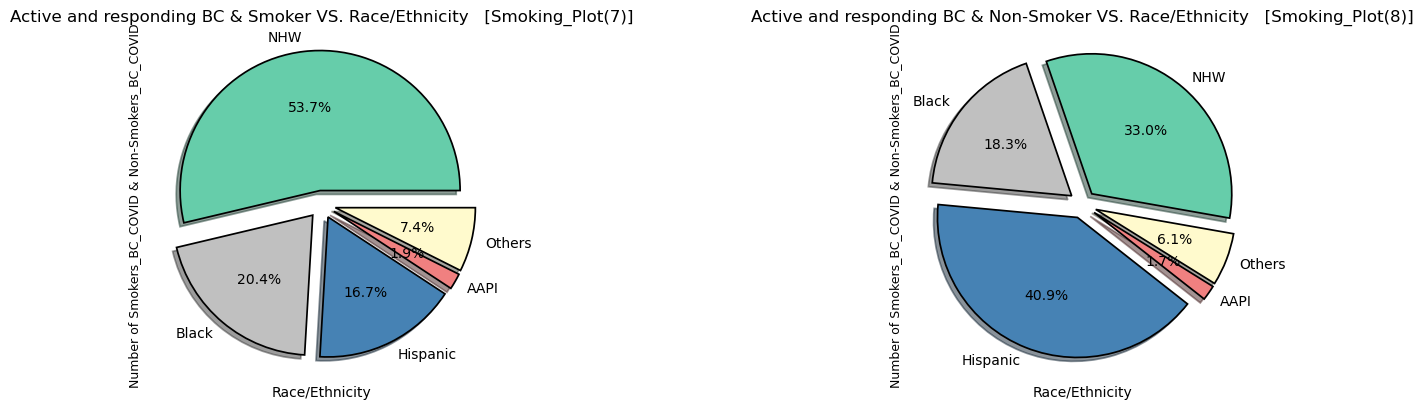

In [262]:
# Plotting

# Active and responding BC
colors = ["mediumaquamarine", "silver", "steelblue", "lightcoral", "lemonchiffon"]
explode = (0.1,0.1,0.1,0.1,0.1)
wp = {"linewidth" : 1.25, "edgecolor" : "Black"} #this would add black edge color to the chart with the specific width

fig = plt.figure(figsize=(18,10)) # this would change the size of the chart
#first row, first column
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(A_Res_BC_Smoker_NonSmoker_DF["Smoker_A_Res_Count"],colors=colors,labels = Race_Ethnicity, autopct = "%1.1f%%", explode = explode, wedgeprops = wp, shadow = True)
plt.title("Active and responding BC & Smoker VS. Race/Ethnicity   [Smoking_Plot(7)]")
plt.ylabel("Number of Smokers_BC_COVID & Non-Smokers_BC_COVID", fontsize=9)
plt.xlabel("Race/Ethnicity")

#first row sec column
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(A_Res_BC_Smoker_NonSmoker_DF["NonSmoker_A_Res_Count"],colors=colors, labels = Race_Ethnicity, autopct = "%1.1f%%", startangle=-10, explode = explode, wedgeprops = wp, shadow = True)
plt.title("Active and responding BC & Non-Smoker VS. Race/Ethnicity   [Smoking_Plot(8)]")
plt.ylabel("Number of Smokers_BC_COVID & Non-Smokers_BC_COVID", fontsize=9)
plt.xlabel("Race/Ethnicity")
plt.savefig("Smoking_Output_Data/SmokingQ_Plot(7_8).png")

In [277]:
# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(A_Res_BC_Smoker_NonSmoker_DF)

# Display test results
print("\nChi-squared statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

# Check the significance level (e.g., 0.05)
alpha = 0.05

# Make a decision based on the p-value
if p < alpha:
    print("\nReject the null hypothesis. There is a significant relationship.")
else:
    print("\nFail to reject the null hypothesis. There is no significant relationship.")


Chi-squared statistic: 10.639585551769875
P-value: 0.030927597927065998
Degrees of freedom: 4
Expected frequencies:
[[21.40828402 45.59171598]
 [10.22485207 21.77514793]
 [17.89349112 38.10650888]
 [ 0.95857988  2.04142012]
 [ 3.5147929   7.4852071 ]]

Reject the null hypothesis. There is a significant relationship.


Analysis: Since the p-value is smaller than 0.05, we reject the null hypothesis. This means that there is a significant difference between the two data sets. Therefore, amongst all the races with active and responding breast cancer statuses, smoking is a factor for them to have COVID.

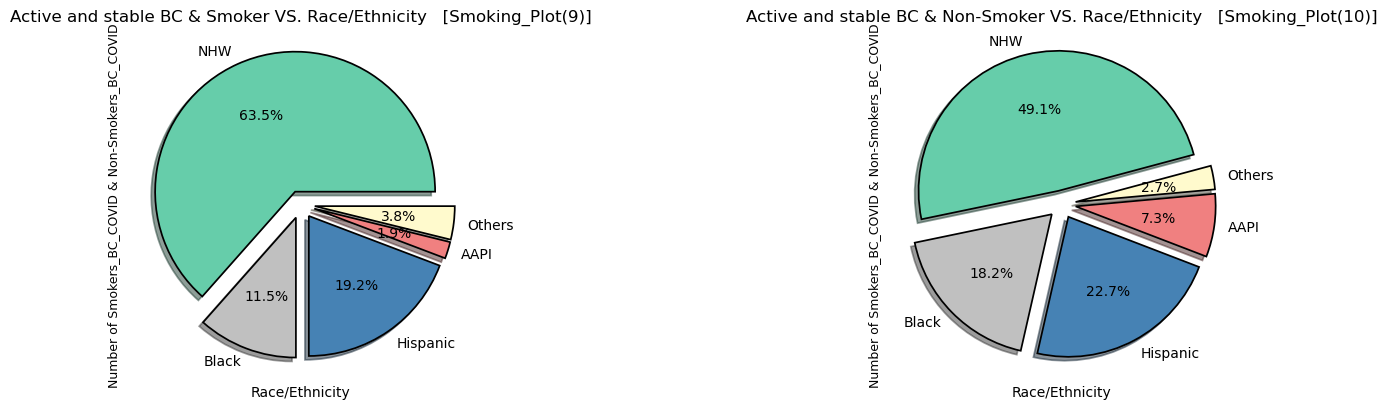

In [263]:
# Plotting

# Active and stable BC
colors = ["mediumaquamarine", "silver", "steelblue", "lightcoral", "lemonchiffon"]
explode = (0.1,0.1,0.1,0.1,0.1)
wp = {"linewidth" : 1.25, "edgecolor" : "Black"}

fig = plt.figure(figsize=(18,10))
#first row, first column
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(A_St_BC_Smoker_NonSmoker_DF["Smoker_A_St_Count"],colors=colors,labels = Race_Ethnicity, autopct = "%1.1f%%", explode = explode, wedgeprops = wp, shadow = True)
plt.title("Active and stable BC & Smoker VS. Race/Ethnicity   [Smoking_Plot(9)]")
plt.ylabel("Number of Smokers_BC_COVID & Non-Smokers_BC_COVID", fontsize=9)
plt.xlabel("Race/Ethnicity")

#first row sec column
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(A_St_BC_Smoker_NonSmoker_DF["NonSmoker_A_St_Count"],colors=colors, labels = Race_Ethnicity, autopct = "%1.1f%%", startangle=15, explode = explode, wedgeprops = wp, shadow = True)
plt.title("Active and stable BC & Non-Smoker VS. Race/Ethnicity   [Smoking_Plot(10)]")
plt.ylabel("Number of Smokers_BC_COVID & Non-Smokers_BC_COVID", fontsize=9)
plt.xlabel("Race/Ethnicity")
plt.savefig("Smoking_Output_Data/SmokingQ_Plot(9_10).png")

In [278]:
# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(A_St_BC_Smoker_NonSmoker_DF)

# Display test results
print("\nChi-squared statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

# Check the significance level (e.g., 0.05)
alpha = 0.05

# Make a decision based on the p-value
if p < alpha:
    print("\nReject the null hypothesis. There is a significant relationship.")
else:
    print("\nFail to reject the null hypothesis. There is no significant relationship.")


Chi-squared statistic: 4.49062693274895
P-value: 0.34366033039037724
Degrees of freedom: 4
Expected frequencies:
[[27.92592593 59.07407407]
 [ 8.34567901 17.65432099]
 [11.2345679  23.7654321 ]
 [ 2.88888889  6.11111111]
 [ 1.60493827  3.39506173]]

Fail to reject the null hypothesis. There is no significant relationship.


Analysis: Since the p-value is greater than 0.05, we cannot reject the null hypothesis. This means that there is no significant difference between the two data sets. Therefore, amongst all the races with active and stable breast cancer statuses, smoking is not a factor for them to have COVID.

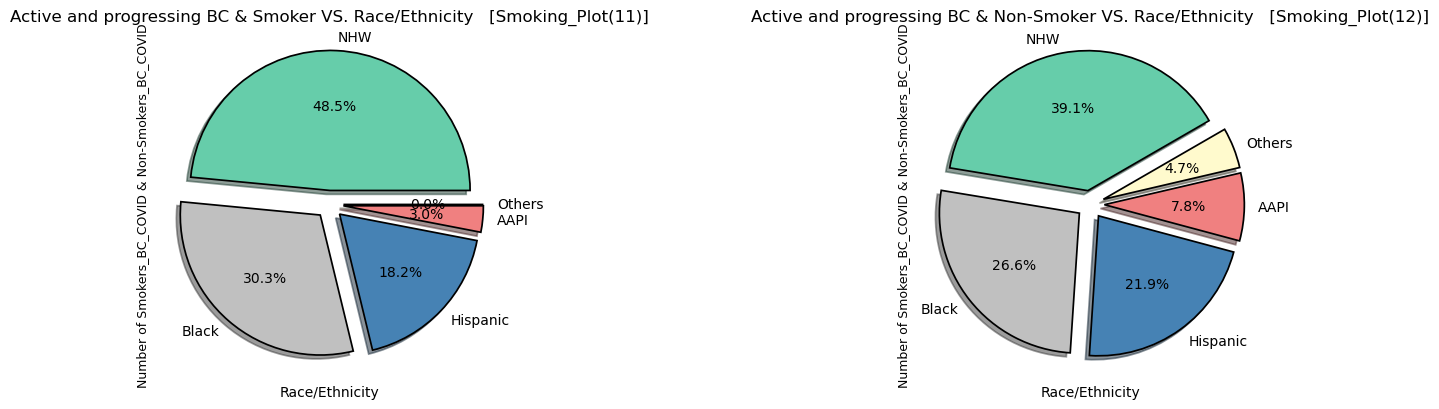

In [264]:
# Plotting

# Active and progressing BC
colors = ["mediumaquamarine", "silver", "steelblue", "lightcoral", "lemonchiffon"]
explode = (0.1,0.1,0.1,0.1,0.1)
wp = {"linewidth" : 1.25, "edgecolor" : "Black"}

fig = plt.figure(figsize=(18,10))
#first row, first column
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(A_Prog_BC_Smoker_NonSmoker_DF["Smoker_A_Prog_Count"],colors=colors,labels = Race_Ethnicity, autopct = "%1.1f%%", explode = explode, wedgeprops = wp, shadow = True)
plt.title("Active and progressing BC & Smoker VS. Race/Ethnicity   [Smoking_Plot(11)]")
plt.ylabel("Number of Smokers_BC_COVID & Non-Smokers_BC_COVID", fontsize=9)
plt.xlabel("Race/Ethnicity")

#first row sec column
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(A_Prog_BC_Smoker_NonSmoker_DF["NonSmoker_A_Prog_Count"],colors=colors, labels = Race_Ethnicity, autopct = "%1.1f%%", startangle=30, explode = explode, wedgeprops = wp, shadow = True)
plt.title("Active and progressing BC & Non-Smoker VS. Race/Ethnicity   [Smoking_Plot(12)]")
plt.ylabel("Number of Smokers_BC_COVID & Non-Smokers_BC_COVID", fontsize=9)
plt.xlabel("Race/Ethnicity")
plt.savefig("Smoking_Output_Data/SmokingQ_Plot(11_12).png")

In [279]:
# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(A_Prog_BC_Smoker_NonSmoker_DF)

# Display test results
print("\nChi-squared statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

# Check the significance level (e.g., 0.05)
alpha = 0.05

# Make a decision based on the p-value
if p < alpha:
    print("\nReject the null hypothesis. There is a significant relationship.")
else:
    print("\nFail to reject the null hypothesis. There is no significant relationship.")


Chi-squared statistic: 3.0626860149598967
P-value: 0.5473904040466475
Degrees of freedom: 4
Expected frequencies:
[[13.94845361 27.05154639]
 [ 9.18556701 17.81443299]
 [ 6.80412371 13.19587629]
 [ 2.04123711  3.95876289]
 [ 1.02061856  1.97938144]]

Fail to reject the null hypothesis. There is no significant relationship.


Analysis: Since the p-value is greater than 0.05, we cannot reject the null hypothesis. This means that there is no significant difference between the two data sets. Therefore, amongst all the races with active and progressing breast cancer statuses, smoking is not a factor for them to have COVID.

# Overall Analysis

In order to answer this question, the data was isolated and cleaned. Then through a step by step process, three different dataframes were created for each breast cancer statuses. Each dataframe compares the race/ethnicity for all types of COVID-19 severity with the smoking status. Pie charts Smoking_Plot(7), Smoking_Plot(8), Smoking_Plot(9), Smoking_Plot(10), Smoking_Plot(11), and Smoking_Plot(12) display the results for smokers and non-smokers. Refering to these plots, it can be concluded that amongst all the races smoking is not a factor for the individuals with active and stable as well as active and progressing breast cancer statuses to have COVID-19. However, amongst all the races smoking is a factor for the individuals with active and responding breast cancer status to have COVID-19.

The hypothesis for this experiment was that "Amongst all the races with different breast cancer statuses, smoking is a factor for them to have COVID". However, looking at the pie charts and with the analysis which was done, it could be seen that amongst all the races smoking is not a factor for the individuals with active and stable as well as active and progressing breast cancer statuses to have COVID-19. However, amongst all the races smoking is a factor for the individuals with active and responding breast cancer status to have COVID-19. A hypothesis testing called chi-squared was also done to test the hypothesis. Two different groups of smokers and non-smokers were tested. This resulted in a p-value of 0.34 and 0.55 respectively for individuals with different races and active and stable as well as active and progressing breast cancer statuses which is greater than 0.05. Therefore, the null hypothesis cannot be rejected and it can be concluded that there is no significant difference between the two data sets and as a result, amongst all the races smoking is not a factor for the individuals with active and stable as well as active and progressing breast cancer statuses to have COVID-19. However, the p-value for the individuals with active and responding breast cancer status is 0.03 which is less than 0.05. Therefore, the null hypothesis is rejected and it can be concluded that there is a significant difference between the two data sets and as a result, amongst all the races smoking is a factor for the individuals with active and responding breast cancer status to have COVID-19.